<a href="https://www.kaggle.com/code/mohammadabdelhalim/titanic-eda-5-models?scriptVersionId=127904121" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Ask**
* ###  **What is the overall survival rate?**
* ### **How does the survival rate differ based on gender?**
* ### **Did passenger class affect survival rates?**
* ### **Were children more likely to survive compared to adults?**
* ### **Any relationship between family and survival rates?**
* ### **Did the embarkation location affect survival rates?**
* ### **Did the title affect survival rate?**
* ### **Any relationship between the fare and survival rates?**

# **Importing libiraires**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **Reading the data**

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# **Data Understanding**

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Survived column does not exsist, because it is our target.**

In [10]:
test_data.shape

(418, 11)

# **Data Cleaning**

In [11]:
# check for duplicates
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


**No Duplicates.**

In [12]:
# check for null values
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**There are 177 in Age, 687 in Cabin and 2 in Embarked.**

In [13]:
# check for null values
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [15]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
#Fill null values in Embarked with most common value 'S'
train_data["Embarked"].fillna("S", inplace= True)

train_data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


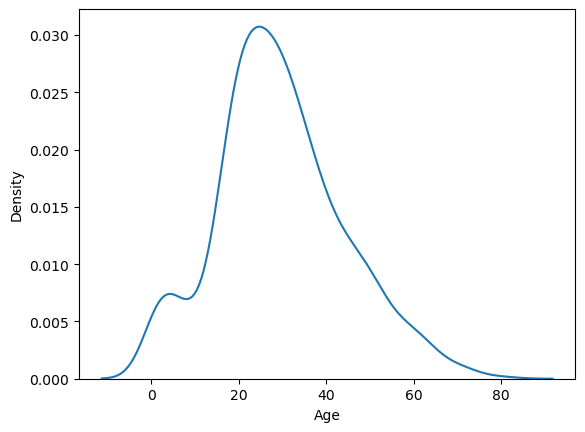

In [19]:
# show the distribution for Age 
sns.kdeplot(data=train_data, x="Age");

**The age is slightly right skewed, so we will fill null values with median.**

In [20]:
age_median = train_data["Age"].median()
train_data["Age"].fillna(age_median, inplace=True)

age_median2 = test_data["Age"].median()
test_data["Age"].fillna(age_median2, inplace=True)

In [21]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [22]:
train_data["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

**Let's fill this.**

In [23]:
# Fill missing values in Cabin with "N/A"
train_data['Cabin'] = train_data['Cabin'].fillna('N/A')
test_data['Cabin'] = test_data['Cabin'].fillna('N/A')


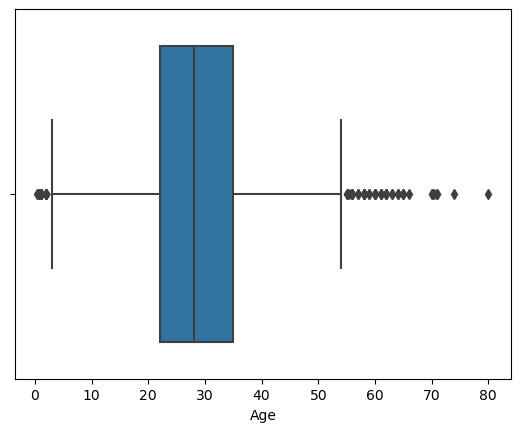

In [24]:
# draw a boxplot for Age column
sns.boxplot(data=train_data,x="Age");

**We have some outliers, but I prefer not to remove them. I think they provide significant info.**

In [25]:
train_data["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [26]:
train_data["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [27]:
train_data["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

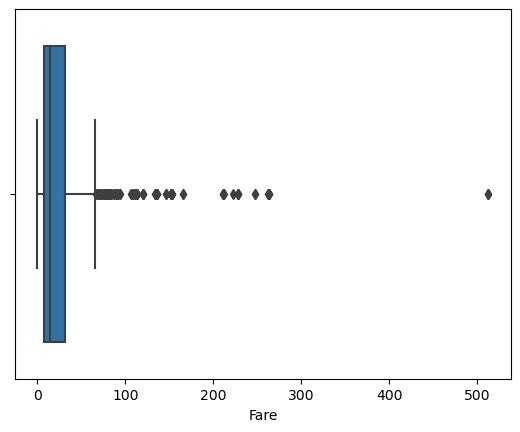

In [28]:
sns.boxplot(data=train_data,x="Fare");

In [29]:
test_data["Age"].max()

76.0

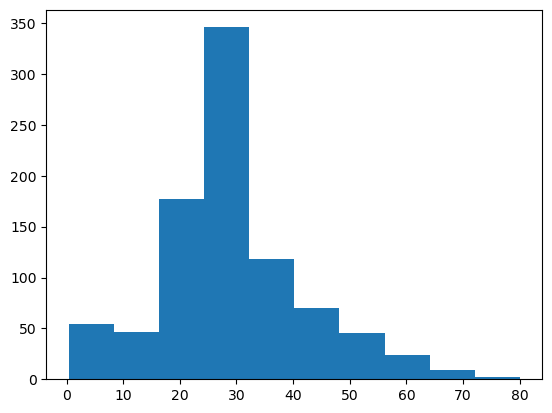

In [30]:
plt.hist(train_data["Age"]);

In [31]:
# create AgeGroup column
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels)
test_data["AgeGroup"] = pd.cut(test_data["Age"], bins=bins, labels = labels)

In [32]:
train_data["AgeGroup"].value_counts()

Young Adult    447
Adult          241
Teenager        70
Child           69
Senior          64
Name: AgeGroup, dtype: int64

In [33]:
# create title column 
train_data["Title"] = [name.split(',')[1].split('.')[0].strip() for name in train_data['Name']]
test_data["Title"] = [name.split(',')[1].split('.')[0].strip() for name in test_data['Name']]


In [34]:
train_data["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [35]:
test_data["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [36]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Countess', 'Mme', 'Ms', 'Mlle','the Countess' ], 'Other')
test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Countess', 'Mme', 'Ms', 'Mlle','the Countess','Dona'], 'Other')

In [37]:
train_data["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [38]:
test_data["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: Title, dtype: int64

In [39]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,N/A,S,Young Adult,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Young Adult,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,N/A,S,Young Adult,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Young Adult,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,N/A,Q,Adult,Mr


# **EDA**

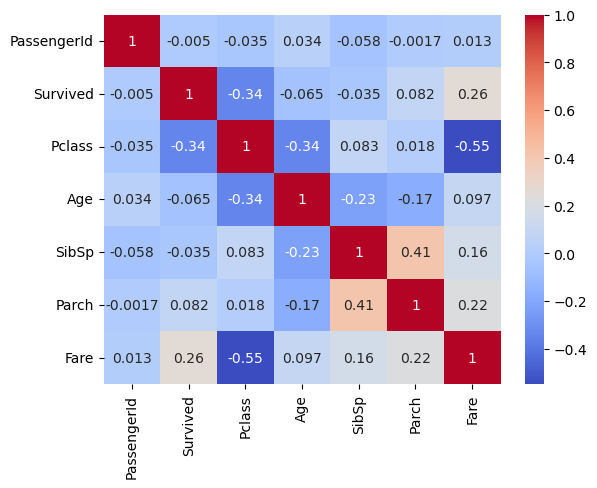

In [40]:
# Create a correlation matrix
corr = train_data.corr()

# Create a heatmap using seaborn
sns.heatmap(corr, cmap="coolwarm", annot=True);

**Pclass and Fare are negatively correlated.**

## **What is the overall survival rate?**

In [41]:
# Count the number of survivors
num_survivors = train_data["Survived"].sum()

# Calculate the overall survival rate
total_passengers = len(train_data)
survival_rate = (num_survivors / total_passengers) * 100

print("The overall survival rate was: {:.2f}%".format(survival_rate))

The overall survival rate was: 38.38%


## **Does passenger class affect survival rates?** 

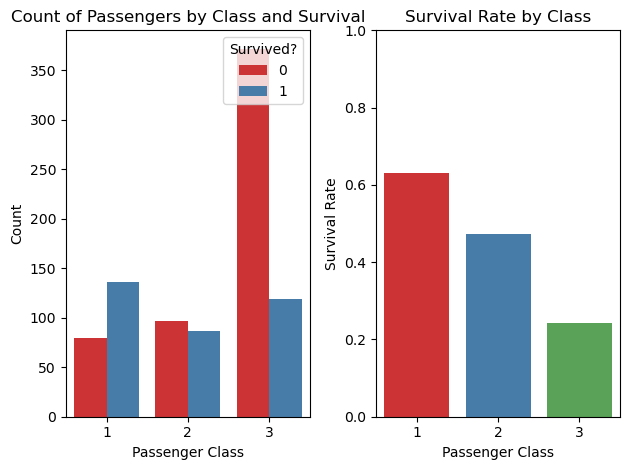

In [42]:
# Count plot
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='Set1')
plt.title('Count of Passengers by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived?', loc='upper right')

# Bar plot
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
survival_rate_by_class = train_data.groupby('Pclass')['Survived'].mean().reset_index()
sns.barplot(x='Pclass', y='Survived', data=survival_rate_by_class, palette='Set1')
plt.title('Survival Rate by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.ylim(0, 1) # Set y-axis limit from 0 to 1

plt.tight_layout() # Adjust the layout of the plots
plt.show()

* **Passengers in 1st class are more likely to survive.**
* **Passengers in 3d class are more likely to die.**


## **How does the survival rate differ by gender?**

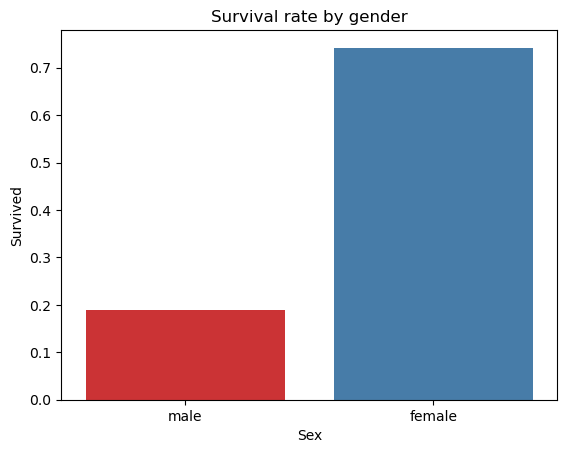

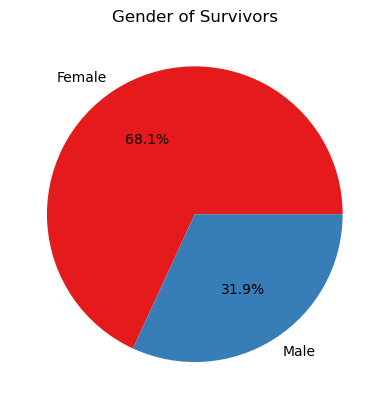

In [43]:
# Calculate survival rate based on gender
survival_rate = (train_data.groupby('Sex')['Survived'].mean()*100).round(1)

# Plot survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_data, ci=None, palette='Set1')
plt.title("Survival rate by gender")
plt.show()

# Select only the passengers who survived
survived = train_data[train_data['Survived'] == 1]

# Count the number of males and females
gender_counts = survived['Sex'].value_counts()

# Plot the gender pie chart
palette = "Set1"
colors = sns.color_palette(palette)

labels = ['Female','Male']
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Gender of Survivors')
plt.show()


**Women have a greater chance of survivalthan men.**

In [44]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S,Young Adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S,Adult,Mr


## **Any relationship between Age and Survival?**

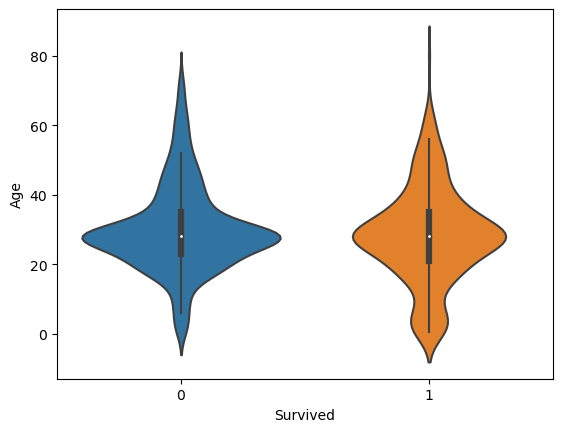

In [45]:
sns.violinplot(x='Survived', y='Age', data=train_data);

## **Were children more likely to survive compared to adults?**

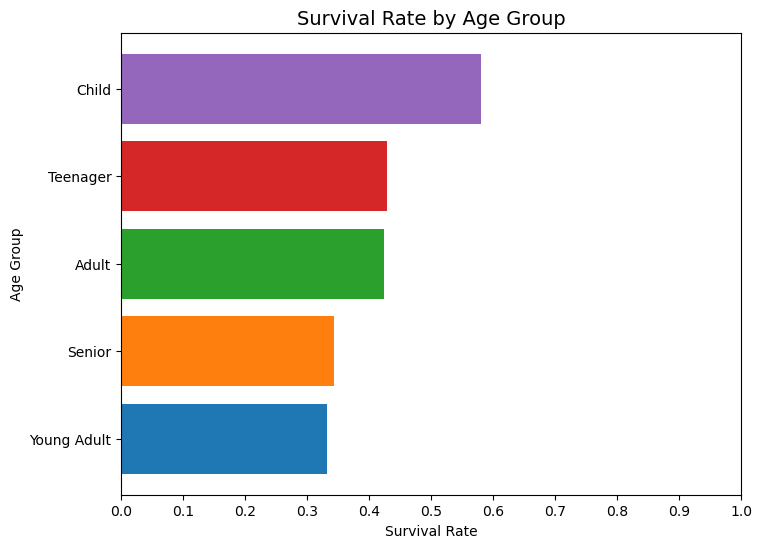

In [46]:
agegroup_survival_rate = train_data.groupby('AgeGroup')['Survived'].mean().sort_values()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

plt.figure(figsize=(8,6))
plt.barh(agegroup_survival_rate.index, agegroup_survival_rate.values, color = colors)
plt.title('Survival Rate by Age Group', fontsize=14)
plt.xlabel('Survival Rate')
plt.ylabel('Age Group')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()


**Children have a greater chance of survival.**

In [47]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S,Young Adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S,Adult,Mr


## **Any relationship between Family on board and survival rates?**

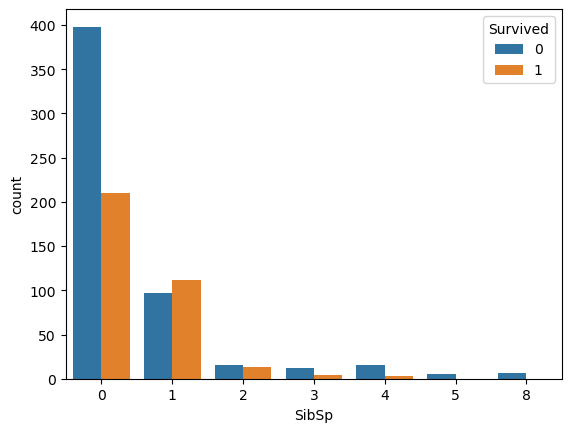

In [48]:
sns.countplot(x="SibSp", hue="Survived", data=train_data)
plt.show()

**The count of survived people having only one siblings/spouses is greater than who died.**

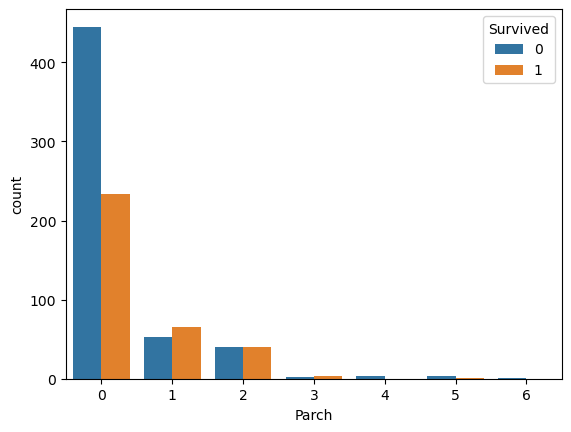

In [49]:
sns.countplot(x="Parch", hue="Survived", data=train_data)
plt.show()

**The count of survived people having only one  parents/children is greater than who died.**

## **Did the embarkation location affect survival rates??** 

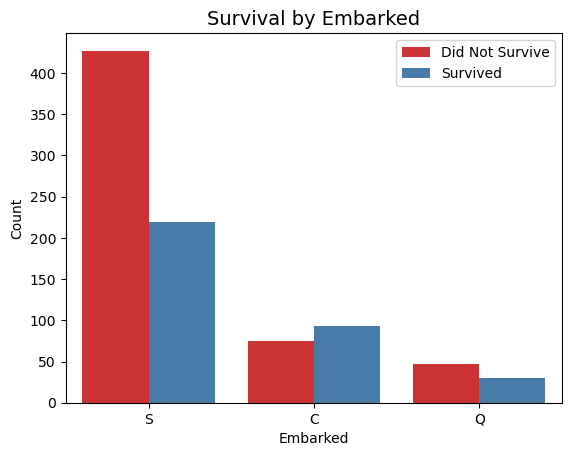

In [50]:
sns.countplot(x='Embarked', hue='Survived', data=train_data, palette='Set1')

plt.title('Survival by Embarked', fontsize=14)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Did Not Survive', 'Survived'], loc='upper right')
plt.show()


**The number of embarked survivals from Cherbourg is > than who number of who died.**

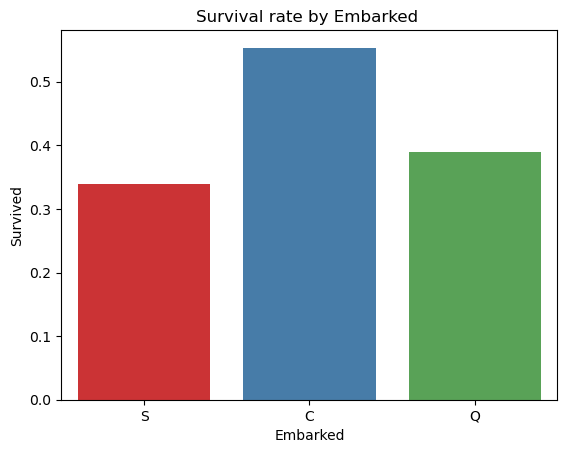

In [51]:
sns.barplot(x='Embarked', y='Survived', data=train_data, ci=None, palette='Set1');
plt.title("Survival rate by Embarked ")
plt.show()

In [52]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S,Young Adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S,Young Adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S,Adult,Mr


## **Any relationship between the fare and survival rates?** 

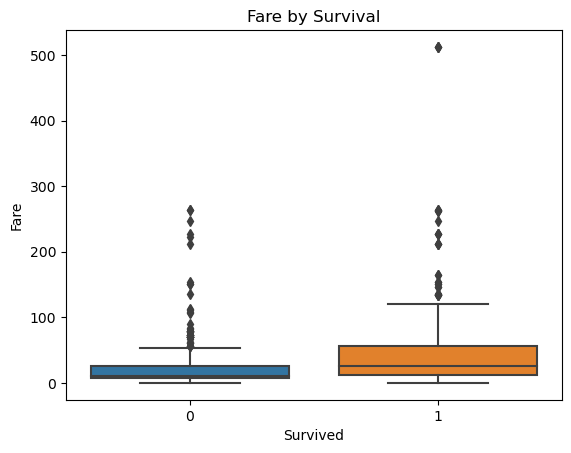

In [53]:
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Fare by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


**Survived passengers paid more.**

## **Any relationship between the title and survival?**

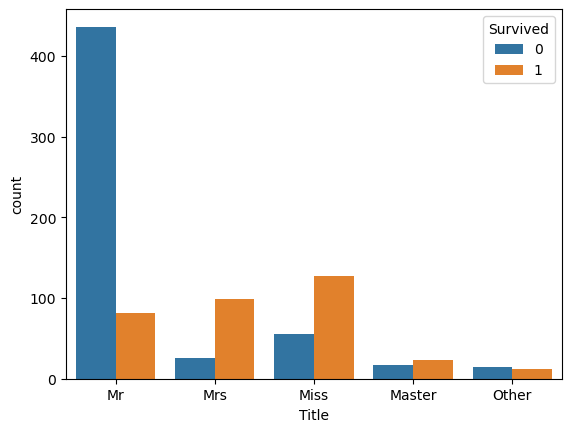

In [54]:
sns.countplot(x='Title', hue='Survived', data=train_data)
plt.show()

**It is clear that Mrs,Miss and Master are more likely to survive.**

In [55]:
train_data.shape

(891, 14)

In [56]:
train_data["Title"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [57]:
train_data[train_data["Title"] == "Dona"]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title


In [58]:
test_data[train_data["Title"] == "Dona"]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title


In [59]:
test_data["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: Title, dtype: int64

# **Model building**

In [60]:
# Create a new feature called IsAlone
train_data['IsAlone'] = 0
train_data.loc[(train_data['SibSp'] + train_data['Parch']) == 0, 'IsAlone'] = 1

test_data['IsAlone'] = 0
test_data.loc[(test_data['SibSp'] + test_data['Parch']) == 0, 'IsAlone'] = 1


In [61]:

# Create the Deck feature
train_data['Deck'] = train_data['Cabin'].apply(lambda x: x[0])
test_data['Deck'] = test_data['Cabin'].apply(lambda x: x[0])


In [62]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,IsAlone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N/A,S,Young Adult,Mr,0,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,Mrs,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N/A,S,Young Adult,Miss,1,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,Mrs,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N/A,S,Adult,Mr,1,N


In [63]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Title,IsAlone,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,N/A,Q,Adult,Mr,1,N
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,N/A,S,Adult,Mrs,0,N
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,N/A,Q,Senior,Mr,1,N
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,N/A,S,Young Adult,Mr,1,N
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,N/A,S,Young Adult,Mrs,0,N


In [64]:
Passenger_Id  = test_data["PassengerId"]

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Define the features and target variable
features = ["Pclass","Sex","Fare","Embarked","AgeGroup","SibSp","Parch","IsAlone","Title","Deck"]
target = "Survived"

# Split the data into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(train_data[features], train_data[target], test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


# Prepare the training data
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
test_data = pd.get_dummies(test_data[features])

# Align columns in training and test data
X_train, test_data = X_train.align(test_data, join='outer', axis=1, fill_value=0)
X_val, test_data = X_val.align(test_data, join='outer', axis=1, fill_value=0)

# Scale numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = ["Fare","SibSp","Parch"]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])




In [66]:
# Fit and evaluate Support Vector Classifier model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)
svc_y_pred_val = svc_model.predict(X_val)
svc_acc_val = accuracy_score(y_val, svc_y_pred_val)
svc_cm_val = confusion_matrix(y_val, svc_y_pred_val)
svc_report_val = classification_report(y_val, svc_y_pred_val)

print("Support Vector Classifier Accuracy on validation data: ", round(svc_acc_val*100, 2), "%")
print("Support Vector Classifier Confusion Matrix on validation data:\n", svc_cm_val)
print("Support Vector Classifier Classification Report on validation data:\n", svc_report_val)

# Make predictions on test data using the trained model
y_pred_svc = svc_model.predict(test_data)

Support Vector Classifier Accuracy on validation data:  80.9 %
Support Vector Classifier Confusion Matrix on validation data:
 [[97 16]
 [18 47]]
Support Vector Classifier Classification Report on validation data:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       113
           1       0.75      0.72      0.73        65

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



In [67]:
# Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_val = rfc_model.predict(X_val)

# Evaluate model on validation data
acc_val = round(accuracy_score(y_val, y_pred_val) * 100, 2)
print("Random Forest Classifier accuracy on validation data:", acc_val)
print("Random Forest Classifier confusion matrix on validation data:")
print(confusion_matrix(y_val, y_pred_val))
print("Random Forest Classifier classification report on validation data:")
print(classification_report(y_val, y_pred_val))

# Make predictions on test data using the trained model
y_pred_rfc = rfc_model.predict(test_data)


Random Forest Classifier accuracy on validation data: 80.9
Random Forest Classifier confusion matrix on validation data:
[[100  13]
 [ 21  44]]
Random Forest Classifier classification report on validation data:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       113
           1       0.77      0.68      0.72        65

    accuracy                           0.81       178
   macro avg       0.80      0.78      0.79       178
weighted avg       0.81      0.81      0.81       178



In [68]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_knn_val = knn_model.predict(X_val)
acc_knn_val = round(accuracy_score(y_val, y_pred_knn_val) * 100, 2)
print("K-Nearest Neighbors Classifier accuracy on validation data:", acc_knn_val)
print("K-Nearest Neighbors Classifier confusion matrix on validation data:")
print(confusion_matrix(y_val, y_pred_knn_val))
print("K-Nearest Neighbors Classifier classification report on validation data:")
print(classification_report(y_val, y_pred_knn_val))

# Make predictions on test data using the trained model
y_pred_knn = knn_model.predict(test_data)


K-Nearest Neighbors Classifier accuracy on validation data: 79.78
K-Nearest Neighbors Classifier confusion matrix on validation data:
[[99 14]
 [22 43]]
K-Nearest Neighbors Classifier classification report on validation data:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       113
           1       0.75      0.66      0.70        65

    accuracy                           0.80       178
   macro avg       0.79      0.77      0.78       178
weighted avg       0.79      0.80      0.79       178



In [69]:
# Fit decision tree model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_val = dt_model.predict(X_val)

# Evaluate model on validation data
acc_val = round(accuracy_score(y_val, y_pred_val) * 100, 2)
print("Decision Tree Classifier accuracy on validation data:", acc_val)
print("Decision Tree Classifier confusion matrix on validation data:")
print(confusion_matrix(y_val, y_pred_val))
print("Decision Tree Classifier classification report on validation data:")
print(classification_report(y_val, y_pred_val))

# Make predictions on test data using the trained model
y_pred_dt = dt_model.predict(test_data)

Decision Tree Classifier accuracy on validation data: 77.53
Decision Tree Classifier confusion matrix on validation data:
[[91 22]
 [18 47]]
Decision Tree Classifier classification report on validation data:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       113
           1       0.68      0.72      0.70        65

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.78      0.78      0.78       178



In [70]:
# Fit and evaluate Logistic Regression model
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

# Make predictions on validation data
y_pred_val = lr_model.predict(X_val)

# Evaluate model on validation data
acc_val = round(accuracy_score(y_val, y_pred_val) * 100, 2)
print("Logistic Regression Model accuracy on validation data:", acc_val)
print("Logistic Regression Model confusion matrix on validation data:")
print(confusion_matrix(y_val, y_pred_val))
print("Logistic Regression Model classification report on validation data:")
print(classification_report(y_val, y_pred_val))

# Make predictions on test data using the trained model
y_pred_lr = lr_model.predict(test_data)


Logistic Regression Model accuracy on validation data: 80.34
Logistic Regression Model confusion matrix on validation data:
[[96 17]
 [18 47]]
Logistic Regression Model classification report on validation data:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       113
           1       0.73      0.72      0.73        65

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



## **We will submit using RFC model**

In [71]:
# Create submission file
submission = pd.DataFrame({
    "PassengerId": Passenger_Id,
    "Survived": y_pred_rfc
})
submission.to_csv("submission.csv", index=False)


## **My score is : 0.79186**

## **If you found this notebook useful, please consider UPvoting it!"**